In [39]:
#Import Library untuk mengolah data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import Library Sklearn untuk Evaluasi
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [40]:
# Load dan Membaca Data
from google.colab import files

uploaded = files.upload()

df = pd.read_excel(next(iter(uploaded.keys())))

Saving DataSKM.xlsx to DataSKM (2).xlsx


In [41]:
# Cek nama kolom untuk memastikan tidak ada typo
print("Daftar nama kolom dalam dataset:")
print(df.columns)

# Hapus kolom yang tidak relevan sejak awal
df.drop(columns=['No', 'Timestamp', 'Jenis Kelamin', 'Jenis Pelayanan'], inplace=True, errors='ignore')

# Menampilkan baris
df.head(20)

Daftar nama kolom dalam dataset:
Index(['No', 'Timestamp', 'Jenis Kelamin', 'Jenis Pelayanan', 'U1', 'U2', 'U3',
       'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'Hasil '],
      dtype='object')


,U1,U2,U3,U4,U5,U6,U7,U8,U9,Hasil
0,4,4,4,4,4,4,4,4,4,Sangat Puas
1,3,3,2,4,3,3,3,3,3,Puas
2,3,3,4,3,3,3,3,3,3,Puas
3,4,4,4,4,4,4,4,4,4,Sangat Puas
4,4,3,2,4,3,3,3,3,3,Puas
5,3,3,3,4,3,3,3,4,2,Puas
6,3,3,3,4,3,3,3,4,3,Puas
7,4,3,2,3,3,3,2,2,2,Kurang Puas
8,4,3,3,4,3,3,3,3,3,Puas
9,3,3,3,4,3,3,3,4,3,Puas


In [42]:
# Menampilkan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   U1      303 non-null    int64 
 1   U2      303 non-null    int64 
 2   U3      303 non-null    int64 
 3   U4      303 non-null    int64 
 4   U5      303 non-null    int64 
 5   U6      303 non-null    int64 
 6   U7      303 non-null    int64 
 7   U8      303 non-null    int64 
 8   U9      303 non-null    int64 
 9   Hasil   303 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.8+ KB


In [43]:
# Cek missing values
df.isnull().sum()

,0
U1,0
U2,0
U3,0
U4,0
U5,0
U6,0
U7,0
U8,0
U9,0
Hasil,0


In [44]:
# Encoding label "Hasil"
label_encoder = LabelEncoder()
df["Hasil "] = label_encoder.fit_transform(df["Hasil "])

# Ubah tipe data kolom "Hasil_Encoded" menjadi numerik
df['Hasil '] = df['Hasil '].astype('int64')

# 0 = Kurang Puas, 1 = Puas, dan 2 = Sangat Puas

In [45]:
# Pisahkan fitur dan target
X = df.drop(columns=["Hasil "])
y = df["Hasil "]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List model yang akan diuji
models = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (RandomForestClassifier(), "Random Forest"),
    (SVC(), "SVM"),
    (KNeighborsClassifier(), "KNN"),
    (GaussianNB(), "Naive Bayes")
]

In [46]:
# Fungsi evaluasi model
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    target_names = [str(cls) for cls in label_encoder.classes_]
    report = classification_report(y_test, y_pred, target_names=target_names)

    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return accuracy_score(y_test, y_pred)


Model: Decision Tree
Confusion Matrix:
[[10  0  0]
 [ 1 21  0]
 [ 0  2 27]]
Classification Report:
              precision    recall  f1-score   support

Kurang Puas        0.91      1.00      0.95        10
        Puas       0.91      0.95      0.93        22
 Sangat Puas       1.00      0.93      0.96        29

    accuracy                           0.95        61
   macro avg       0.94      0.96      0.95        61
weighted avg       0.95      0.95      0.95        61



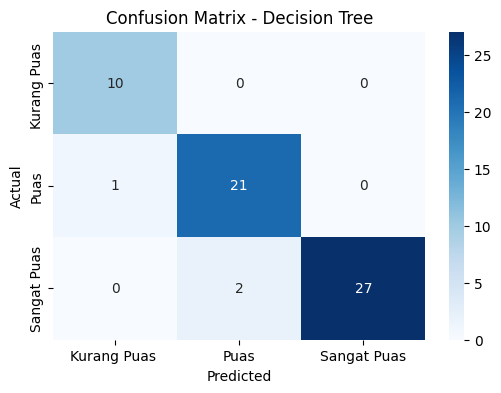


Model: Random Forest
Confusion Matrix:
[[10  0  0]
 [ 1 21  0]
 [ 0  2 27]]
Classification Report:
              precision    recall  f1-score   support

Kurang Puas        0.91      1.00      0.95        10
        Puas       0.91      0.95      0.93        22
 Sangat Puas       1.00      0.93      0.96        29

    accuracy                           0.95        61
   macro avg       0.94      0.96      0.95        61
weighted avg       0.95      0.95      0.95        61



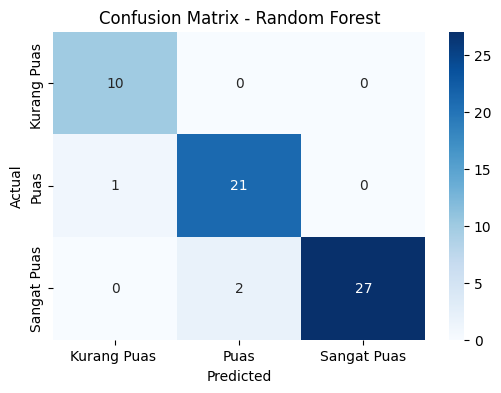


Model: SVM
Confusion Matrix:
[[10  0  0]
 [ 1 21  0]
 [ 0  2 27]]
Classification Report:
              precision    recall  f1-score   support

Kurang Puas        0.91      1.00      0.95        10
        Puas       0.91      0.95      0.93        22
 Sangat Puas       1.00      0.93      0.96        29

    accuracy                           0.95        61
   macro avg       0.94      0.96      0.95        61
weighted avg       0.95      0.95      0.95        61



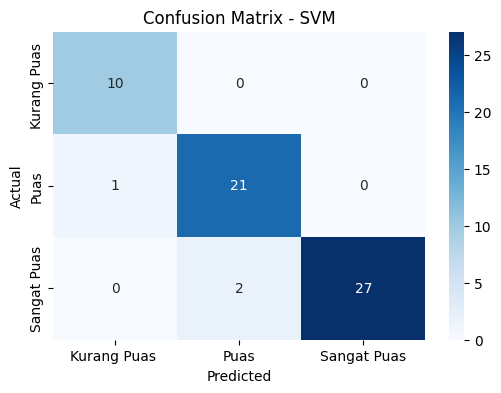


Model: KNN
Confusion Matrix:
[[10  0  0]
 [ 0 22  0]
 [ 0  3 26]]
Classification Report:
              precision    recall  f1-score   support

Kurang Puas        1.00      1.00      1.00        10
        Puas       0.88      1.00      0.94        22
 Sangat Puas       1.00      0.90      0.95        29

    accuracy                           0.95        61
   macro avg       0.96      0.97      0.96        61
weighted avg       0.96      0.95      0.95        61



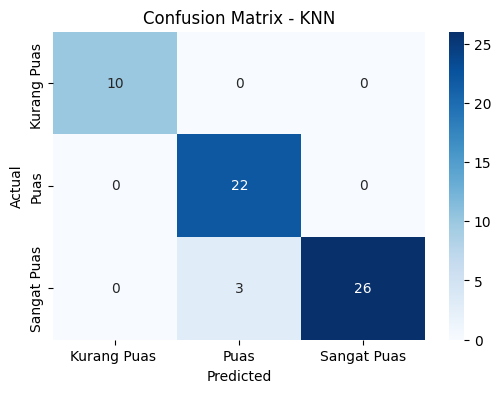


Model: Naive Bayes
Confusion Matrix:
[[10  0  0]
 [ 0 22  0]
 [ 0  2 27]]
Classification Report:
              precision    recall  f1-score   support

Kurang Puas        1.00      1.00      1.00        10
        Puas       0.92      1.00      0.96        22
 Sangat Puas       1.00      0.93      0.96        29

    accuracy                           0.97        61
   macro avg       0.97      0.98      0.97        61
weighted avg       0.97      0.97      0.97        61



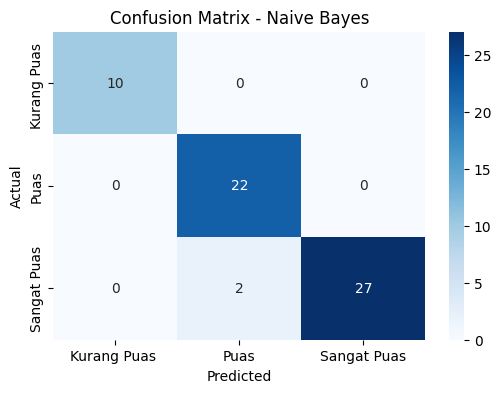

In [47]:
# Evaluasi semua model
results = {}
for model, name in models:
    results[name] = train_and_evaluate(model, name)


Perbandingan Akurasi Model:
                Akurasi
Decision Tree  0.950820
Random Forest  0.950820
SVM            0.950820
KNN            0.950820
Naive Bayes    0.967213


<Figure size 800x500 with 0 Axes>

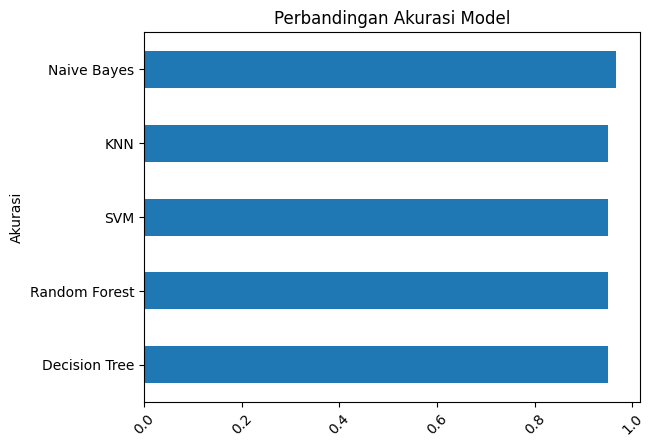

In [48]:
# Bandingkan hasil model
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Akurasi'])
print("\nPerbandingan Akurasi Model:")
print(df_results)

# Visualisasi hasil
plt.figure(figsize=(8, 5))
df_results.plot(kind='barh', legend=False)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.xticks(rotation=45)
plt.show()

In [49]:
# Tentukan model terbaik
best_model = df_results.idxmax().values[0]
print(f"\nModel terbaik berdasarkan akurasi: {best_model}")


Model terbaik berdasarkan akurasi: Naive Bayes


### INI COBA COBA AJA PAKAI KOLOM JENIS KELAMIN DAN JENIS PELAYANAN

kalau ada kemungkinan bahwa "Jenis Kelamin" atau "Jenis Pelayanan" berpengaruh terhadap kepuasan

**Model 1**: Tanpa "Jenis Kelamin" & "Jenis Pelayanan" (seperti di kode awal).

**Model 2**: Dengan "Jenis Kelamin" & "Jenis Pelayanan" yang sudah di-encode.

Bandingkan akurasinya. Kalau hasilnya tidak jauh berbeda, lebih baik dihapus untuk mengurangi kompleksitas.

1.  Akurasi Model 1: 0.9508196721311475
2.  Akurasi Model 2: 0.9508196721311475

Perbedaan akurasi tidak signifikan. Pertimbangkan untuk menghapus 'Jenis Kelamin' & 'Jenis Pelayanan' untuk mengurangi kompleksitas.

***Keputusan akhir: Hapus 'Jenis Kelamin' & 'Jenis Pelayanan'.***

Karena tidak meningkatkan akurasi, lebih baik dihapus untuk efisiensi. Model lebih sederhana tetapi tetap optimal

In [53]:
# # Pastikan tidak ada spasi ekstra atau karakter tersembunyi
# # Bersihkan nama kolom
# df.columns = df.columns.str.strip()
# df["JK"] = df["JK"].str.strip()
# df["JP"] = df["JP"].str.strip()

# # Ubah semua teks ke huruf kecil agar konsisten
# df["JP"] = df["JP"].str.lower()

# # Ubah nama kolom "Jenis Kelamin" menjadi "JK" dan "Jenis Pelayanan" menjadi "JP"
# df.rename(columns={"Jenis Kelamin": "JK", "Jenis Pelayanan": "JP"}, inplace=True)

# # Kenapa? Mencegah error saat mengakses kolom dan mencegah bug saat encoding. Membersihkan nama kolom pakai (df.columns = df.columns.str.strip() dilakukan untuk menghapus spasi yang tidak diinginkan di awal atau akhir nama kolom.

In [51]:
# # Sederhanakan "Jenis Kelamin"
# df["JK"] = df["JK"].replace({
#     "Perempuan": "P",
#     "Laki-laki": "L"
# })

# # Mapping nama kategori yang panjang menjadi lebih pendek
# jenis_pelayanan_map = {
#     "pengangkatan / kenaikan jabatan fungsional ( jafung )": "Jafung",
#     "kartu pegawai ( karpeg ) kartu istri ( karis ) dan kartu suami ( karsu )": "Karis/Karsu",
#     "pemberitahuan tentang kenaikan gaji berkala"  : "Kenaikan Gaji",
#     "pengangkatan pegawai negeri sipil (pns) dari calon pegawai negeri sipil (cpns)" : "PNS dari CPNS",
#     "kenaikan pangkat aparatur sipil negara (asn)" : "KP ASN",
#     "surat izin cuti" : "Cuti",
#     "tugas belajar" : "Tugas",
#     "ujian penyesuaian ijazah" : "ijazah",
#     "kartu tabungan asuransi pensiun ( taspen )" : "Taspen",
#     "mutasi pegawai negeri sipil" : "Mutasi",
#     "izin belajar" : "izin",
#     "ujian dinas" : "Dinas",
#     "pemberhentian dan pensiun pegawai negeri sipil (pns)" : "Pensiun",
#     "sumpah pegawai negeri sipil ( pns )" : "Sumpah PNS"
# }

# # Ganti nama kategori panjang menjadi pendek
# df["JP"] = df["JP"].replace(jenis_pelayanan_map)

# # Pastikan perubahan terjadi
# print(df["JP"].unique())
# print(df["JK"].unique())

# # Cek hasil perubahan kategori
# print(df[["JK", "JP"]].head(20))

In [52]:
# # Encode target variable ("Hasil")
# label_encoder = LabelEncoder()
# df["Hasil"] = label_encoder.fit_transform(df["Hasil"])

# # Encode kategori
# df_encoded = pd.get_dummies(df, columns=["JK", "JP"], drop_first=True)
# df_encoded = df_encoded.drop(['No', 'Timestamp'], axis=1)

# # Buat heatmap korelasi
# corr_matrix = df_encoded.corr()
# plt.figure(figsize=(22, 22))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# plt.title("Heatmap Korelasi Setelah Penyederhanaan Kategori")
# plt.show()